1.SHAP analysis For MOR model

feature_importance_name:
 14        NOr
5          cS
2          cN
19        NSr
15        SOr
10        NCr
11        SCr
22    FNS/FPr
20     FNS/Or
6         OCr
1          cO
4          cP
17        SFr
0          cC
21      FP/Or
8         FOr
18        SPr
3          cF
16        PFr
7         FCr
13        POr
12        NFr
9         PCr
Name: feature, dtype: object
feature_importance_value:
 14    0.190919
5     0.100617
2     0.100300
19    0.096696
15    0.073541
10    0.057126
11    0.056295
22    0.049048
20    0.037059
6     0.034800
1     0.032979
4     0.029604
17    0.027985
0     0.021994
21    0.020143
8     0.015634
18    0.013997
3     0.012403
16    0.011330
7     0.007882
13    0.005402
12    0.004246
9     0.000000
Name: importance, dtype: float64


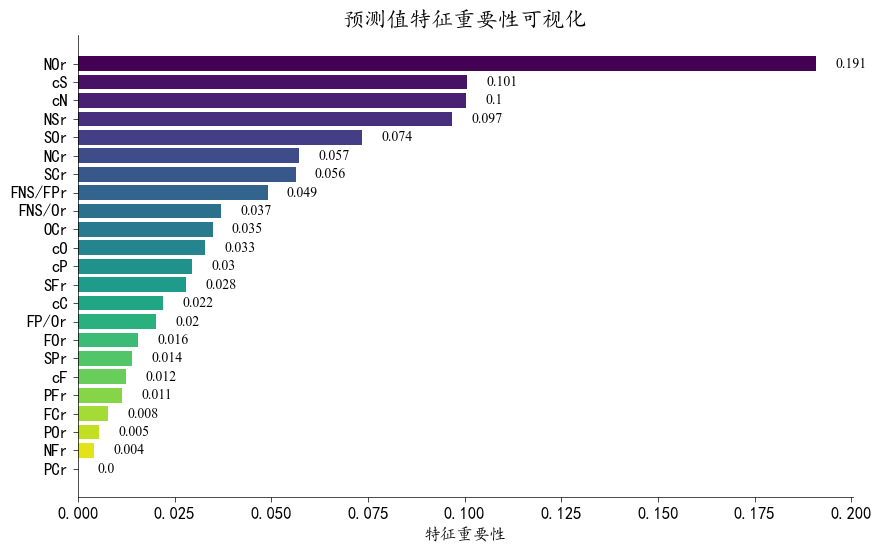

feature_importance_name:
 2          cN
11        SCr
14        NOr
17        SFr
5          cS
12        NFr
19        NSr
0          cC
6         OCr
22    FNS/FPr
20     FNS/Or
3          cF
15        SOr
10        NCr
21      FP/Or
1          cO
7         FCr
18        SPr
8         FOr
9         PCr
13        POr
16        PFr
4          cP
Name: feature, dtype: object
feature_importance_value:
 2     0.140865
11    0.134317
14    0.127617
17    0.097359
5     0.085656
12    0.079065
19    0.050392
0     0.048894
6     0.047597
22    0.035835
20    0.030864
3     0.029362
15    0.029095
10    0.021218
21    0.010604
1     0.010183
7     0.008910
18    0.006951
8     0.005215
9     0.000000
13    0.000000
16    0.000000
4     0.000000
Name: importance, dtype: float64


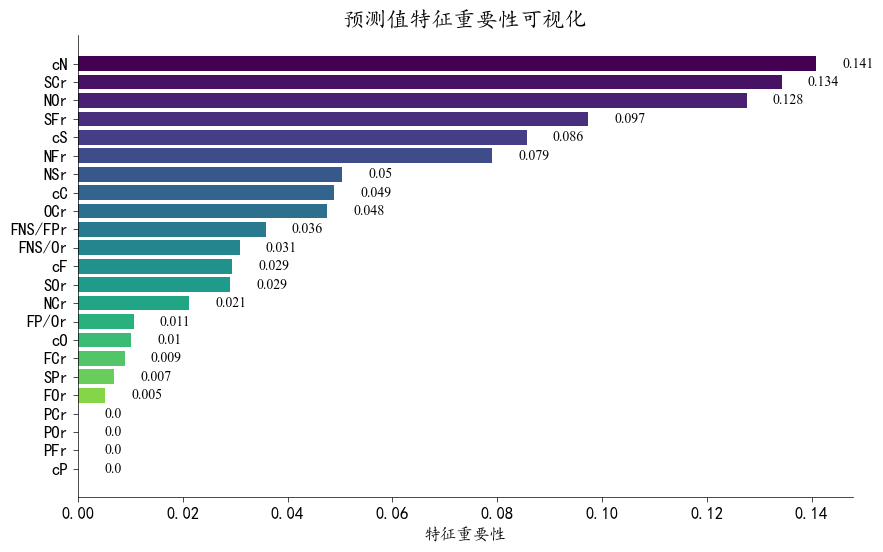

feature_importance_name:
 14        NOr
2          cN
12        NFr
17        SFr
5          cS
19        NSr
22    FNS/FPr
10        NCr
7         FCr
20     FNS/Or
1          cO
8         FOr
15        SOr
11        SCr
0          cC
21      FP/Or
6         OCr
3          cF
9         PCr
13        POr
16        PFr
18        SPr
4          cP
Name: feature, dtype: object
feature_importance_value:
 14    0.156017
2     0.139301
12    0.104162
17    0.098309
5     0.095224
19    0.075659
22    0.071564
10    0.046257
7     0.030337
20    0.030282
1     0.026272
8     0.026075
15    0.024498
11    0.018345
0     0.016684
21    0.016636
6     0.013041
3     0.007056
9     0.003039
13    0.001244
16    0.000000
18    0.000000
4     0.000000
Name: importance, dtype: float64


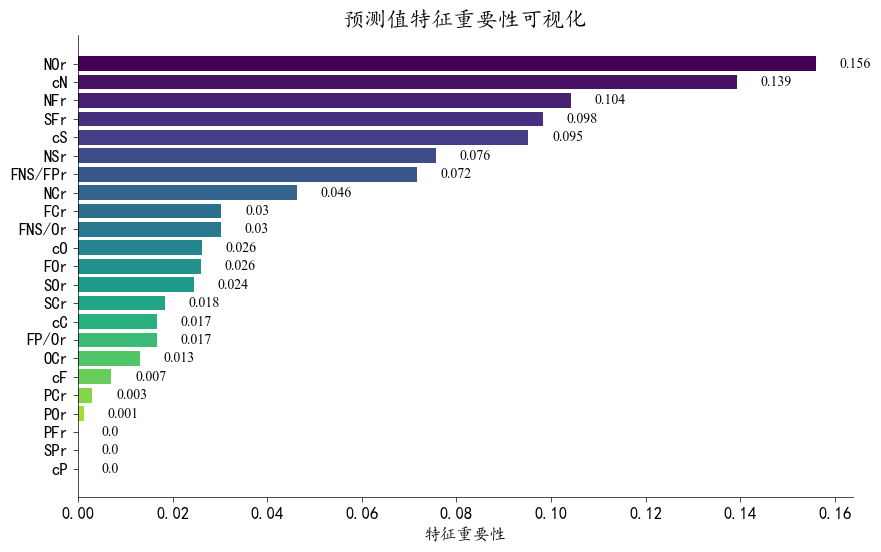

feature_importances_final [0.02919052 0.02314488 0.12682184 0.01627348 0.00986804 0.09383236
 0.03181249 0.01570979 0.0156411  0.00101289 0.04153384 0.06965236
 0.06249115 0.00221513 0.15818414 0.04237825 0.00377663 0.07455087
 0.00698282 0.07424878 0.03273533 0.01579421 0.0521491 ]


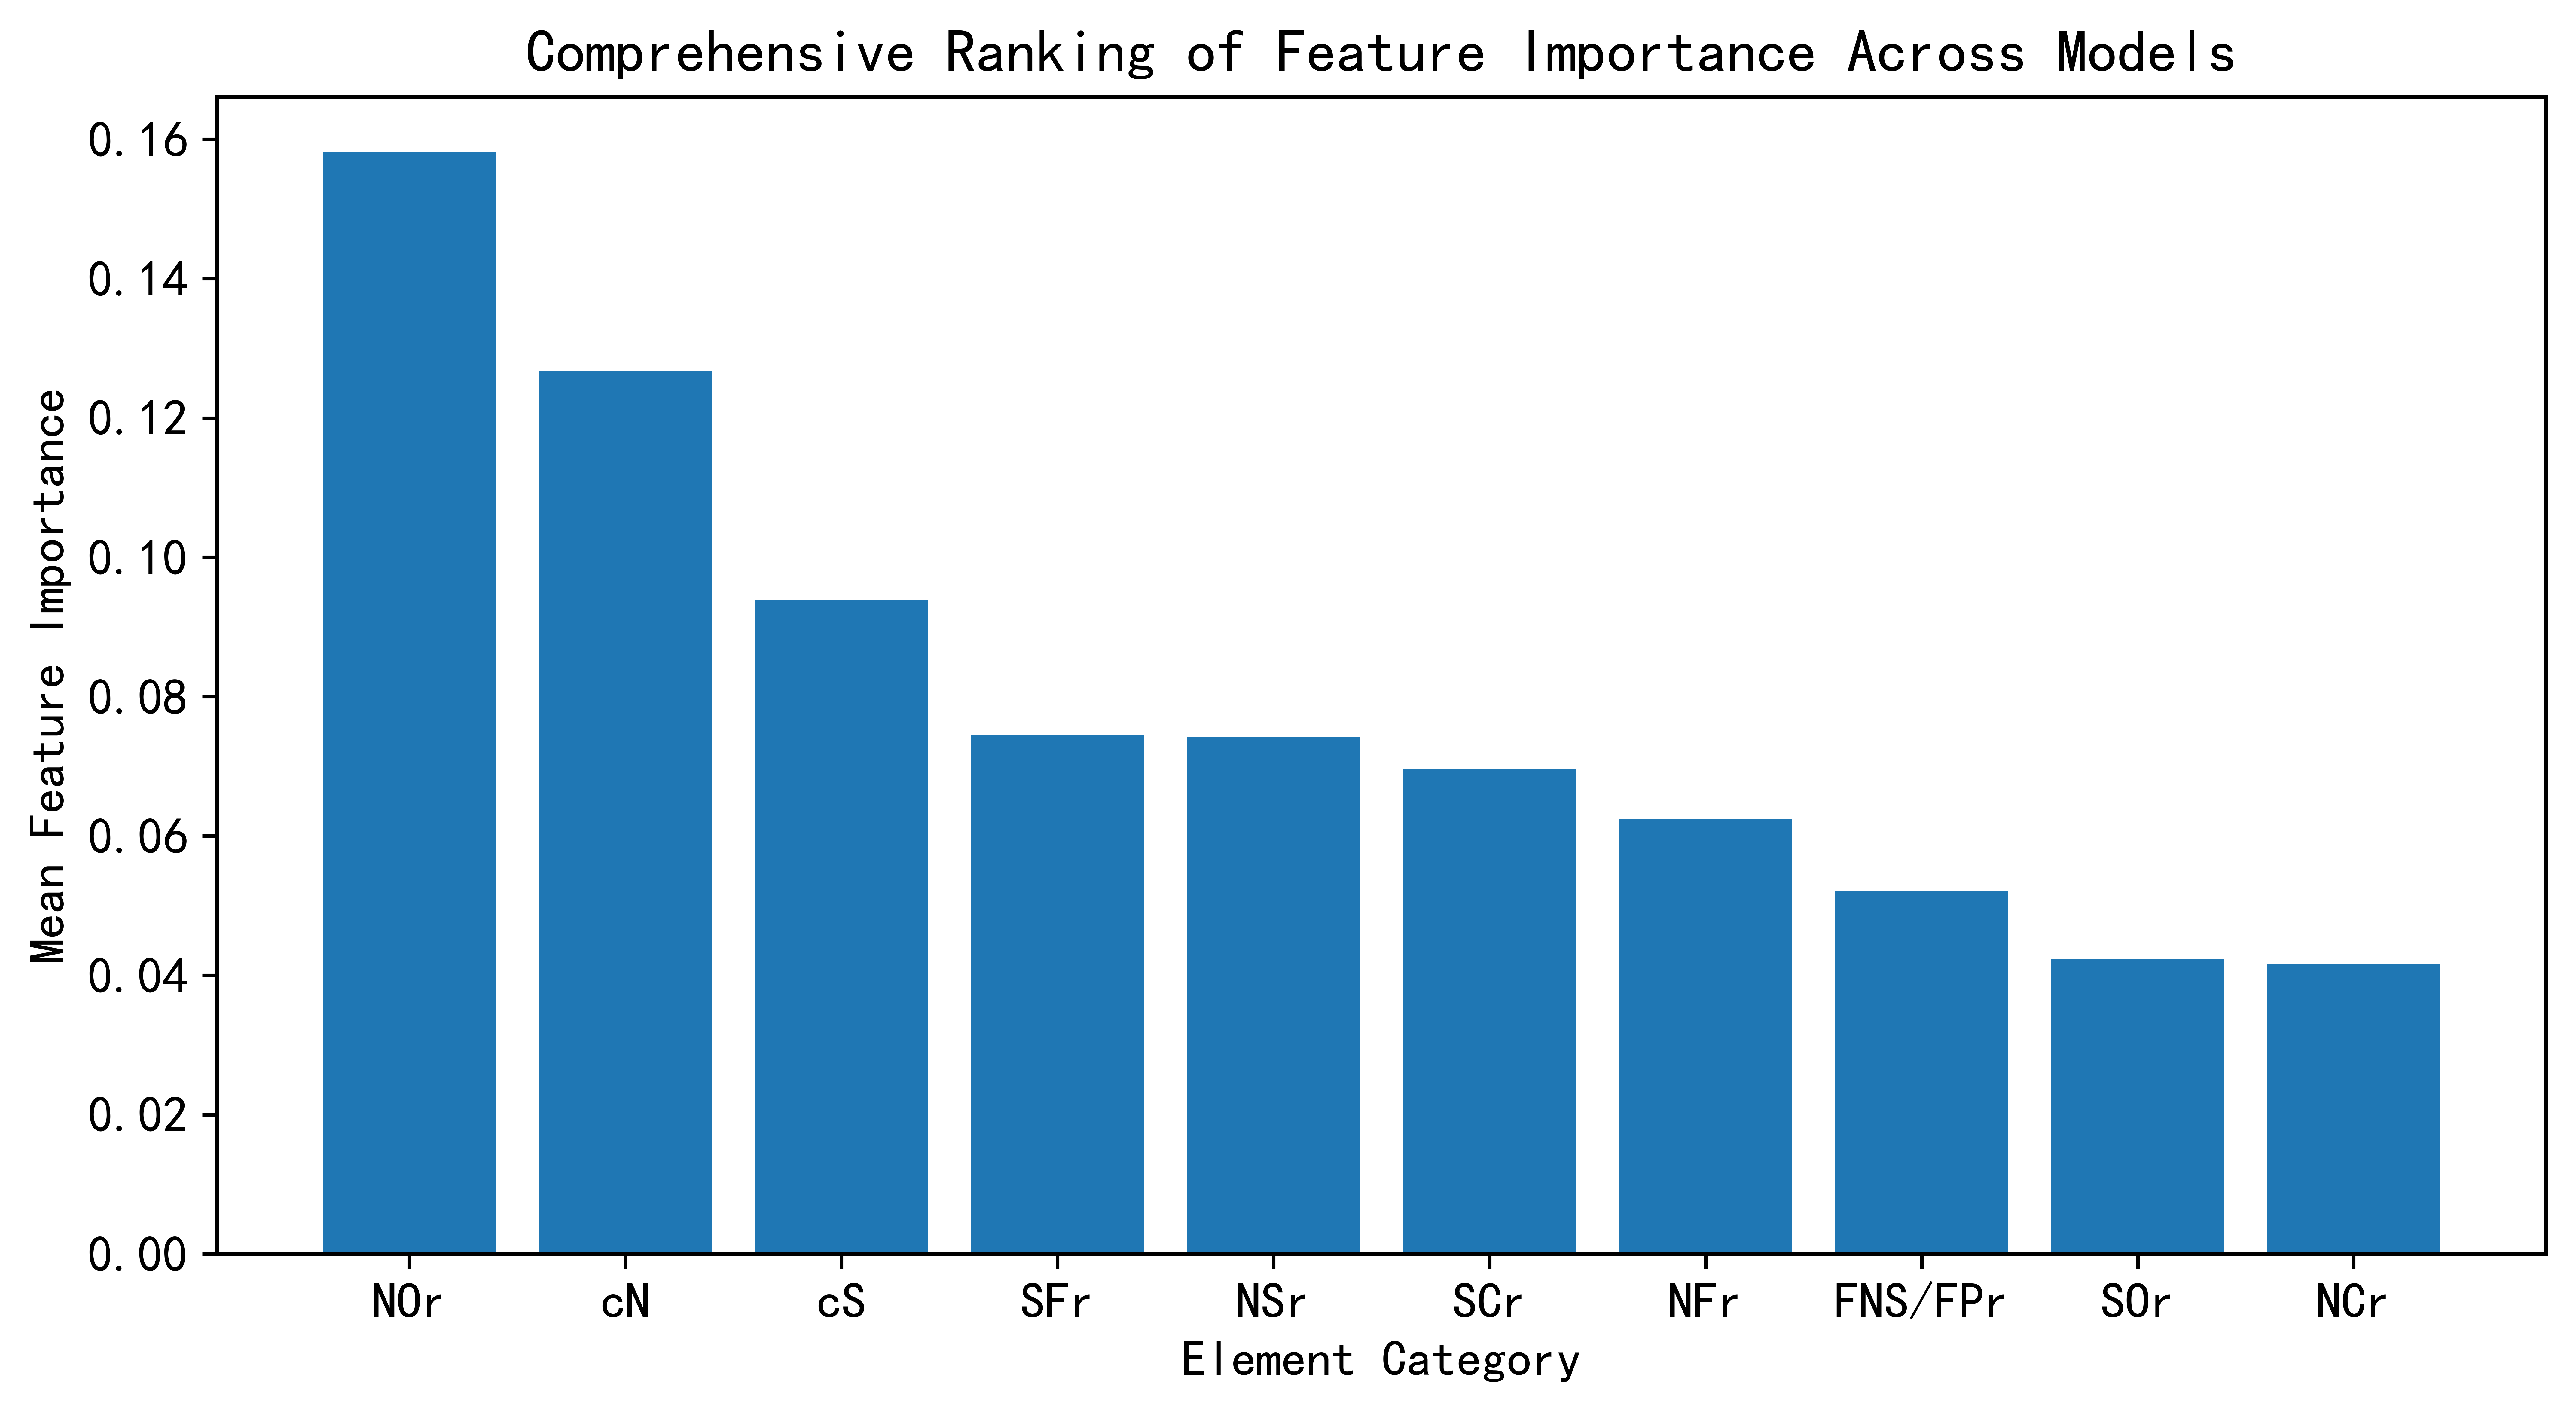

fold_i= [0, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 25, 26, 29, 30, 32, 34, 36, 37, 38, 39, 42, 43, 44, 47, 49, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 66, 68, 69, 70, 71, 72, 73, 75, 76, 78, 79, 80]


fold_i= [1, 0, 1, 2, 3, 4, 5, 7, 8, 11, 13, 14, 15, 16, 19, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 45, 46, 47, 48, 50, 52, 53, 55, 56, 59, 60, 64, 65, 67, 68, 71, 74, 76, 77, 78, 79]


fold_i= [2, 0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 15, 17, 18, 19, 20, 21, 22, 24, 27, 28, 31, 33, 35, 38, 39, 40, 41, 44, 45, 46, 48, 49, 50, 51, 54, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 74, 75, 77, 80]


In [2]:
# Read the number of models, then calculate the Shapley values, sort them, and finally determine the actual values by weighting
from utils import *
save_model = False
main_path = r'../Models_and_Results/trained_Models/MOR'
path = main_path + '/model'
data = pd.read_excel('../Dataset_Process/Dataset/final_data.xlsx', sheet_name='data_labeled_shuffle')
data = data.fillna(0)
datasets = data[data['label'].isin([0,1])]
data_target = data['label']
feature_names = ['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
                 'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
                 'FP/Or','FNS/FPr']
data_features_part = data[feature_names]
feature_importance_ls = np.zeros(len(feature_names))
model_num = 0
draw_pics = True
# def cal_element(element_name):
excel = '../Dataset_Process/Dataset/final_data.xlsx'
feature_importances_final = np.zeros(len(list(feature_names)))

if draw_pics == True:
    for dirpath, dirnames, filenames in os.walk(path):
        model_num = len(filenames)
        i = 0
        for file in filenames:
            model_file = os.path.join(dirpath, file)
            model = joblib.load(model_file)
            feature_importances_final += model.feature_importances_
            show_importance(model, feature_names, save_path=r'2label', pic_index=i)   

            if save_model:
                plt.savefig(main_path + f'/Feature importance of different models/Model {i} feature importance ranking.jpg')
            # print(shap_values[1])
            # for index in range(len(feature_names)):
            #     shap_value_ls[index] += np.sum(shap_values[1][:, index])
            # idx = list(feature_names).index('cS')
            # shap_element = np.sum(shap_values[1][:,:, idx])
            # print('The Shapley value of element is:', shap_element)
            plt.show()
            i += 1
        # feature_importances_final /= 3

    feature_importances_final /= model_num
    importance_dict = dict(zip(feature_importances_final, feature_names))
    # print('shap_dict.items\n', shap_dict.items())
    # shap_dict = dict(sorted(shap_dict.items(), key=lambda item: item[0]))
    # print(model_num)
    
    print('feature_importances_final', feature_importances_final)
    # print('shap_values\n', shap_value_ls)
    # print('shap_dict\n', shap_dict)

    importance_tuplelist = [(abs(value), feature) for (value, feature) in importance_dict.items()]
    importance_sorted = sorted(importance_tuplelist, reverse=True)
    # print('type_shap_sorted=', type(shap_sorted), '\n', shap_sorted)
    # print(shap_sorted[0])
    # print(shap_sorted[0][:])
    plt.figure(figsize=(10, 5), dpi=1000)
    x_feature = [j for (i, j) in importance_sorted]
    y_importance_value = [i for (i, j) in importance_sorted]
    plt.title('Comprehensive Ranking of Feature Importance Across Models')
    plt.xlabel('Element Category')
    plt.ylabel('Mean Feature Importance')
    plt.bar(x_feature[:10], y_importance_value[:10])
    if save_model:
        plt.savefig(main_path + '/Feature Importance Ranking.jpg')

    # print(x_feature)

    plt.show()

for dirpath, dirnames, filenames in os.walk(path):
    model_num = len(filenames)
    fold_ls = create_empty_ls(model_num)
    k_fold_df = pd.read_excel(excel, sheet_name='k-fold')
    i = 0
    for file in filenames:
        # print('fold_ls_original', fold_ls[i])
        fold_ls[i] = list(np.array(k_fold_df.iloc[i]))
        print('fold_i=', fold_ls[i])
        x_test = data_features_part.iloc[fold_ls[i]]
        y_test = data_target.iloc[fold_ls[i]]
        model_file = os.path.join(dirpath, file)
        if save_model:
            model = joblib.load(model_file)
        explainer = shap.TreeExplainer(model)
        shap.initjs()
        shap_values = explainer.shap_values(x_test)
        df0 = pd.DataFrame(np.array(x_test))
        df = pd.DataFrame(np.array(shap_values[1]))
        book = load_workbook(excel)
        if save_model:
            with pd.ExcelWriter(excel) as writer:
                writer.book = book
                df0.to_excel(writer, sheet_name=f'original{i}')
                df.to_excel(writer, sheet_name=f'model{i}')
            # print(f'model{i} shap_values of test data', shap_values)
        i += 1

2. SHAP analysis for GWD model

3
model1
feature_importance_name:
 4          cP
1          cO
0          cC
3          cF
2          cN
20     FNS/Or
19        NSr
21      FP/Or
12        NFr
14        NOr
10        NCr
5          cS
22    FNS/FPr
8         FOr
16        PFr
13        POr
6         OCr
7         FCr
11        SCr
15        SOr
17        SFr
9         PCr
18        SPr
Name: feature, dtype: object
feature_importance_value:
 4     0.090808
1     0.087115
0     0.086806
3     0.074987
2     0.065571
20    0.061926
19    0.060673
21    0.052167
12    0.044869
14    0.043765
10    0.041923
5     0.037226
22    0.036845
8     0.032579
16    0.031690
13    0.031447
6     0.030325
7     0.029348
11    0.027650
15    0.027045
17    0.005236
9     0.000000
18    0.000000
Name: importance, dtype: float64


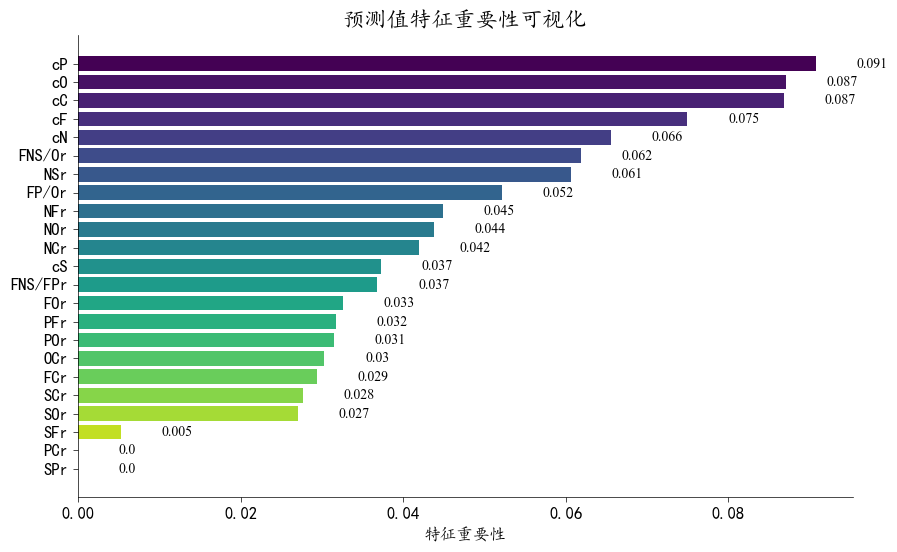

model2
feature_importance_name:
 14        NOr
0          cC
6         OCr
1          cO
22    FNS/FPr
20     FNS/Or
8         FOr
4          cP
10        NCr
3          cF
19        NSr
7         FCr
17        SFr
2          cN
21      FP/Or
15        SOr
13        POr
12        NFr
16        PFr
11        SCr
9         PCr
18        SPr
5          cS
Name: feature, dtype: object
feature_importance_value:
 14    0.157212
0     0.106645
6     0.069587
1     0.068608
22    0.066661
20    0.063704
8     0.063256
4     0.046735
10    0.046506
3     0.045560
19    0.045079
7     0.038056
17    0.036920
2     0.031323
21    0.028032
15    0.022871
13    0.017141
12    0.016986
16    0.013217
11    0.008682
9     0.007220
18    0.000000
5     0.000000
Name: importance, dtype: float64


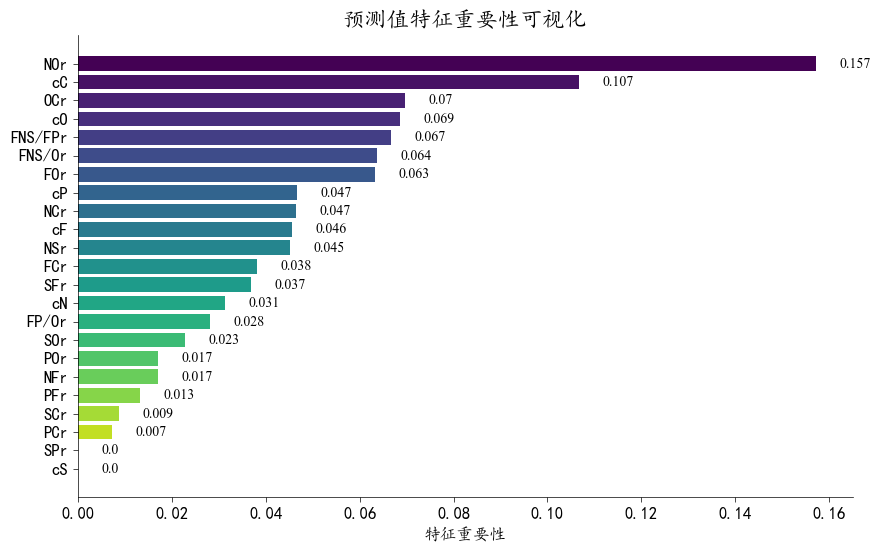

model3
feature_importance_name:
 6         OCr
0          cC
1          cO
19        NSr
20     FNS/Or
13        POr
12        NFr
4          cP
2          cN
11        SCr
8         FOr
21      FP/Or
7         FCr
10        NCr
3          cF
17        SFr
16        PFr
9         PCr
15        SOr
5          cS
14        NOr
22    FNS/FPr
18        SPr
Name: feature, dtype: object
feature_importance_value:
 6     0.112003
0     0.107385
1     0.106328
19    0.071399
20    0.064649
13    0.048682
12    0.045790
4     0.045149
2     0.044432
11    0.044114
8     0.043686
21    0.040146
7     0.039881
10    0.033321
3     0.031636
17    0.024739
16    0.022536
9     0.021897
15    0.020006
5     0.012265
14    0.010403
22    0.009551
18    0.000000
Name: importance, dtype: float64


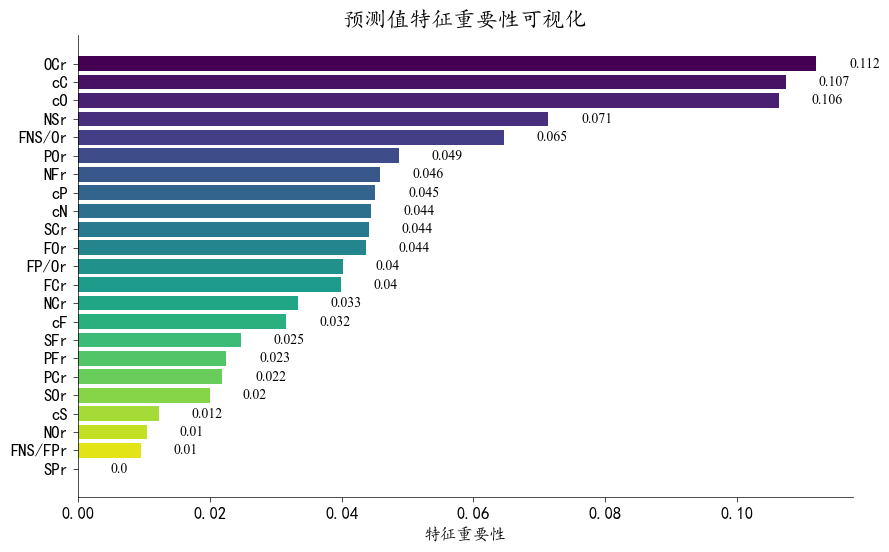

feature_iportance_final [0.10027823 0.08735041 0.04710885 0.05072769 0.06089717 0.01649725
 0.07063817 0.03576156 0.04650676 0.00970573 0.04058326 0.02681539
 0.03588196 0.03242331 0.07046    0.02330747 0.02248098 0.0222984
 0.         0.05905054 0.06342623 0.04011507 0.03768556]
features
cC
cO
OCr
NOr
FNS/Or
cP
NSr
cF
cN
FOr
importance
0.10027822628935555
0.08735040907497986
0.0706381693288115
0.07046000097681236
0.06342622726647601
0.060897165288261834
0.05905053561416417
0.050727686076664245
0.04710885064708098
0.046506761481206395


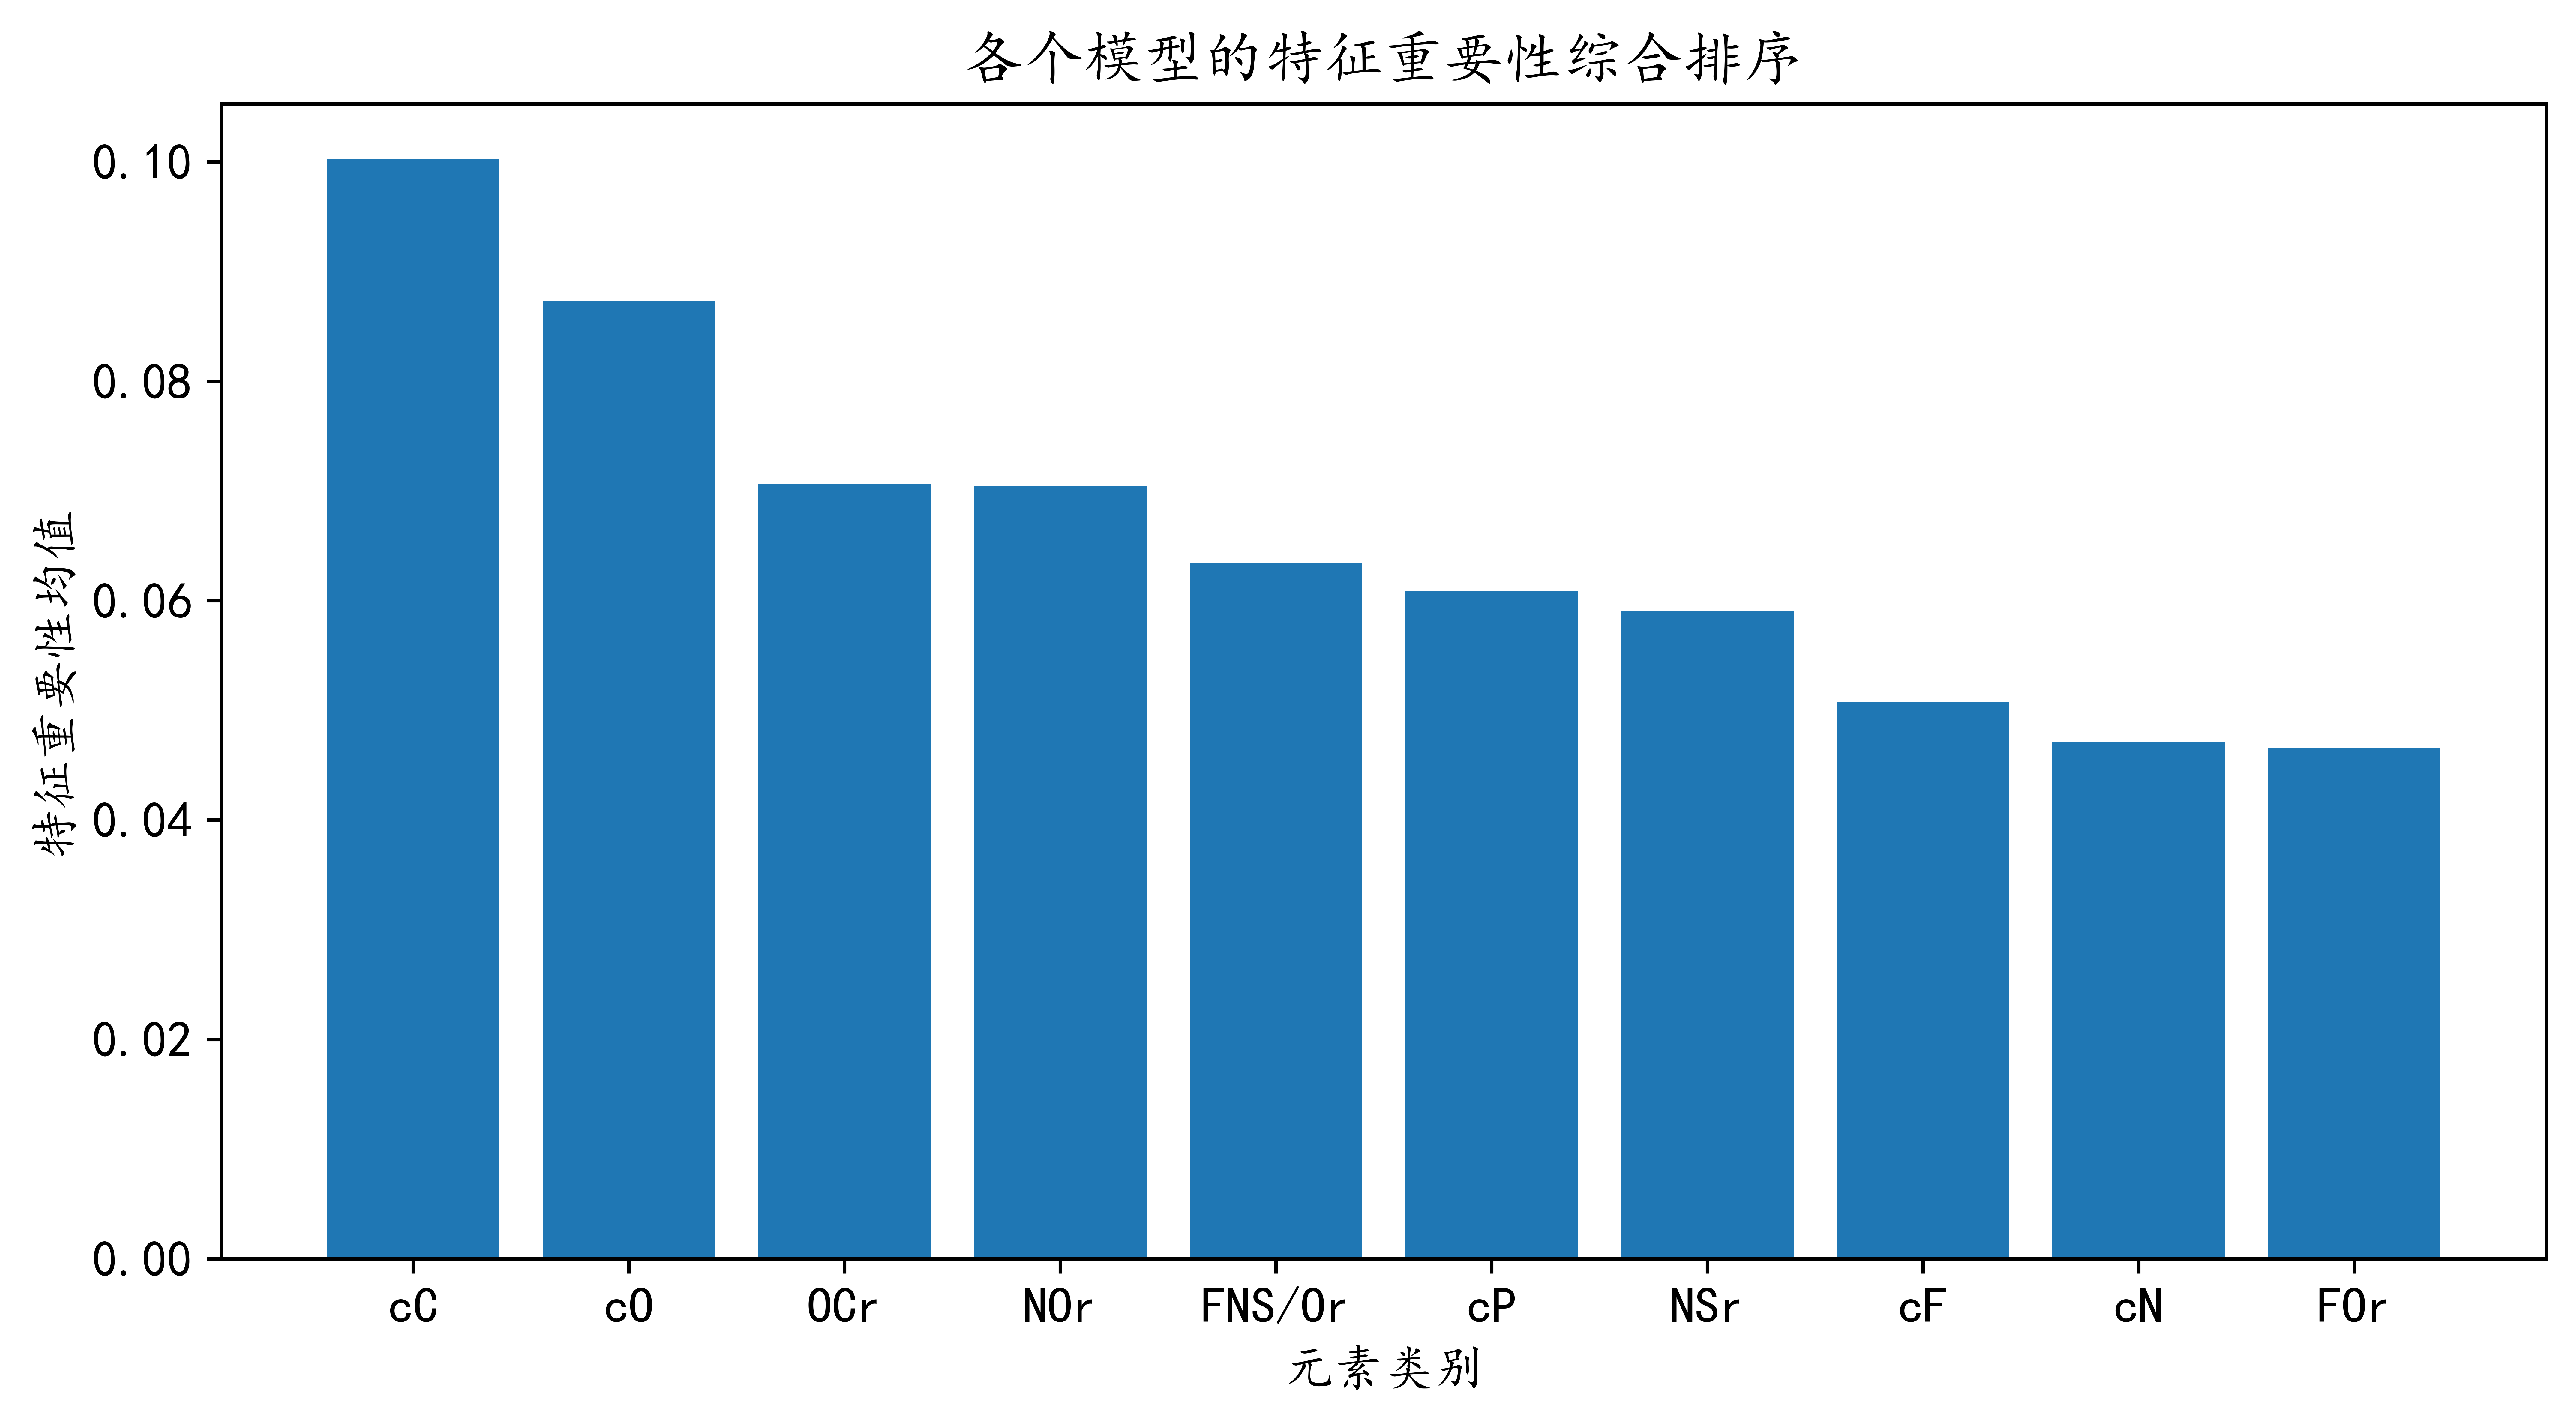

In [ ]:
# Read the number of models, then calculate the SHAP values, sort them, and finally determine the actual values by weighting
from utils import *
data_name = 'GWD'  
label_name = 'GWD' # Name of the dataset label
# main_path = r'final'
# path = main_path + '/model'
main_path = f'../Models_and_Results/trained_Models/GWD'
path = main_path + '/model'

data = pd.read_excel(main_path + '/predict.xlsx', sheet_name=f'{data_name}_data')
data = data.fillna(0)
data_target = data[label_name]
feature_names = ['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
                 'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
                 'FP/Or','FNS/FPr']
data_features_part = data[feature_names]
feature_importance_ls = np.zeros(len(feature_names))
model_num = 0

# print(data)
draw_pics = True
# def cal_element(element_name):
excel = main_path + '/predict.xlsx'
feature_importances_final = np.zeros(len(list(feature_names)))

for dirpath, dirnames, filenames in os.walk(path):
    model_num = len(filenames)
    print(model_num)

if draw_pics == True:
    for dirpath, dirnames, filenames in os.walk(path):
        model_num = len(filenames)
        i = 0
        for file in filenames:
            print(f'model{i+1}')
            model_file = os.path.join(dirpath, file)
            model = joblib.load(model_file)
            feature_importances_final += model.feature_importances_

            show_importance(model, feature_names, save_path=main_path, pic_index=i)                           
            # plt.savefig(main_path + f'/Feature importance ranking of different models/Model {i} feature importance ranking.jpg')
            # print(shap_values[1])
            # for index in range(len(feature_names)):
            #     shap_value_ls[index] += np.sum(shap_values[1][:, index])
            # idx = list(feature_names).index('cS')
            # shap_element = np.sum(shap_values[1][:,:, idx])
            # print('The SHAP value of element is:', shap_element)
            plt.show()
            i += 1
        # feature_importances_final /= 3

    feature_importances_final /= model_num
    importance_dict = dict(zip(feature_importances_final, feature_names))
    # print('shap_dict.items\n', shap_dict.items())
    # shap_dict = dict(sorted(shap_dict.items(), key=lambda item: item[0]))
    # print(model_num)
    
    print('feature_importances_final', feature_importances_final)
    # print('shap_values\n', shap_value_ls)
    # print('shap_dict\n', shap_dict)

    importance_tuplelist = [(abs(value), feature) for (value, feature) in importance_dict.items()]
    importance_sorted = sorted(importance_tuplelist, reverse=True)
    # print('type_shap_sorted=', type(shap_sorted), '\n', shap_sorted)
    # print(shap_sorted[0])
    # print(shap_sorted[0][:])
    plt.figure(figsize=(10, 5), dpi=1000)
    x_feature = [j for (i, j) in importance_sorted]
    y_importance_value = [i for (i, j) in importance_sorted]
    plt.title('Comprehensive Ranking of Feature Importance Across Models')
    plt.xlabel('Element Category')
    plt.ylabel('Mean Feature Importance')


    print('features')
    for i in range(10):
        print(x_feature[i])

    print('importance')
    for i in range(10):
        print(y_importance_value[i])


    plt.bar(x_feature[:10], y_importance_value[:10])
    # plt.savefig(main_path + '/Feature Importance Ranking.jpg')

    # print(x_feature)

    plt.show()

# for dirpath, dirnames, filenames in os.walk(path):
#     model_num = len(filenames)
#     fold_ls = create_empty_ls(model_num)
#     k_fold_df = pd.read_excel(excel, sheet_name='k-fold')
#     i = 0
#     for file in filenames:
#         print('fold_ls_original', fold_ls[i])
#         fold_ls[i] = list(k_fold_df.iloc[i][~k_fold_df.iloc[i].isna()])
#         fold_ls[i].pop(0)
#         print(f'fold_{i}=', fold_ls[i])
#         x_test = data_features_part.iloc[fold_ls[i]]
#         y_test = data_target.iloc[fold_ls[i]]
#         model_file = os.path.join(dirpath, file)
#         model = joblib.load(model_file)
 
#         explainer = shap.TreeExplainer(model)
#         shap.initjs()
 
#         shap_values = explainer.shap_values(x_test)
 
#         df0 = pd.DataFrame(np.array(x_test))
#         df = pd.DataFrame(np.array(shap_values[1]))
#         book = load_workbook(excel)
 
#         with pd.ExcelWriter(excel) as writer:
#             writer.book = book
#             df0.to_excel(writer, sheet_name=f'original{i}')
#             df.to_excel(writer, sheet_name=f'model{i}')
#         # print(f'model{i} shap_values of test

2. SHAP results for GWD model

3
model1
feature_importance_name:
 4          cP
1          cO
0          cC
3          cF
2          cN
20     FNS/Or
19        NSr
21      FP/Or
12        NFr
14        NOr
10        NCr
5          cS
22    FNS/FPr
8         FOr
16        PFr
13        POr
6         OCr
7         FCr
11        SCr
15        SOr
17        SFr
9         PCr
18        SPr
Name: feature, dtype: object
feature_importance_value:
 4     0.090808
1     0.087115
0     0.086806
3     0.074987
2     0.065571
20    0.061926
19    0.060673
21    0.052167
12    0.044869
14    0.043765
10    0.041923
5     0.037226
22    0.036845
8     0.032579
16    0.031690
13    0.031447
6     0.030325
7     0.029348
11    0.027650
15    0.027045
17    0.005236
9     0.000000
18    0.000000
Name: importance, dtype: float64


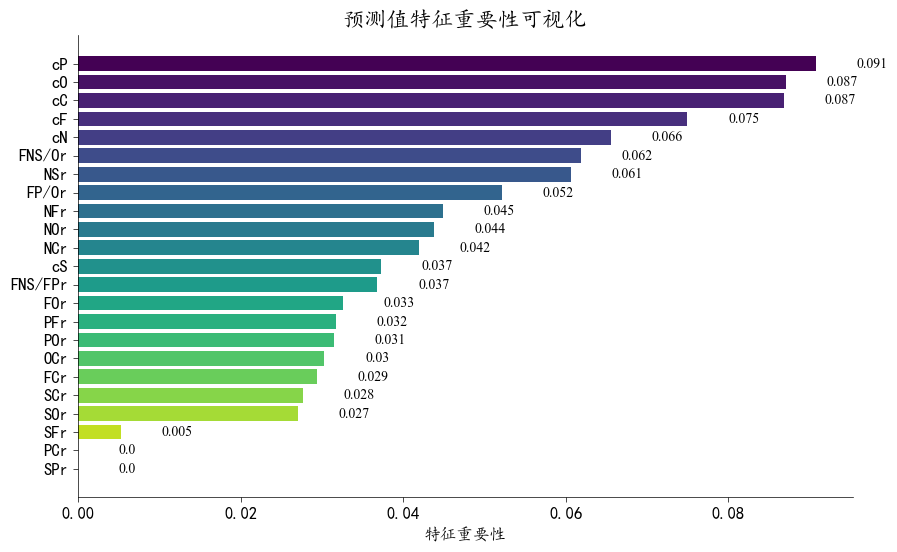

model2
feature_importance_name:
 14        NOr
0          cC
6         OCr
1          cO
22    FNS/FPr
20     FNS/Or
8         FOr
4          cP
10        NCr
3          cF
19        NSr
7         FCr
17        SFr
2          cN
21      FP/Or
15        SOr
13        POr
12        NFr
16        PFr
11        SCr
9         PCr
18        SPr
5          cS
Name: feature, dtype: object
feature_importance_value:
 14    0.157212
0     0.106645
6     0.069587
1     0.068608
22    0.066661
20    0.063704
8     0.063256
4     0.046735
10    0.046506
3     0.045560
19    0.045079
7     0.038056
17    0.036920
2     0.031323
21    0.028032
15    0.022871
13    0.017141
12    0.016986
16    0.013217
11    0.008682
9     0.007220
18    0.000000
5     0.000000
Name: importance, dtype: float64


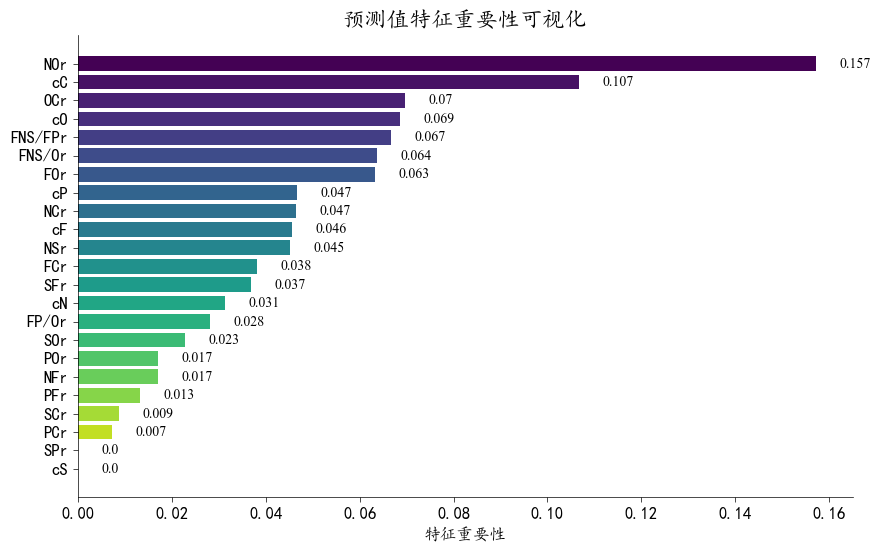

model3
feature_importance_name:
 6         OCr
0          cC
1          cO
19        NSr
20     FNS/Or
13        POr
12        NFr
4          cP
2          cN
11        SCr
8         FOr
21      FP/Or
7         FCr
10        NCr
3          cF
17        SFr
16        PFr
9         PCr
15        SOr
5          cS
14        NOr
22    FNS/FPr
18        SPr
Name: feature, dtype: object
feature_importance_value:
 6     0.112003
0     0.107385
1     0.106328
19    0.071399
20    0.064649
13    0.048682
12    0.045790
4     0.045149
2     0.044432
11    0.044114
8     0.043686
21    0.040146
7     0.039881
10    0.033321
3     0.031636
17    0.024739
16    0.022536
9     0.021897
15    0.020006
5     0.012265
14    0.010403
22    0.009551
18    0.000000
Name: importance, dtype: float64


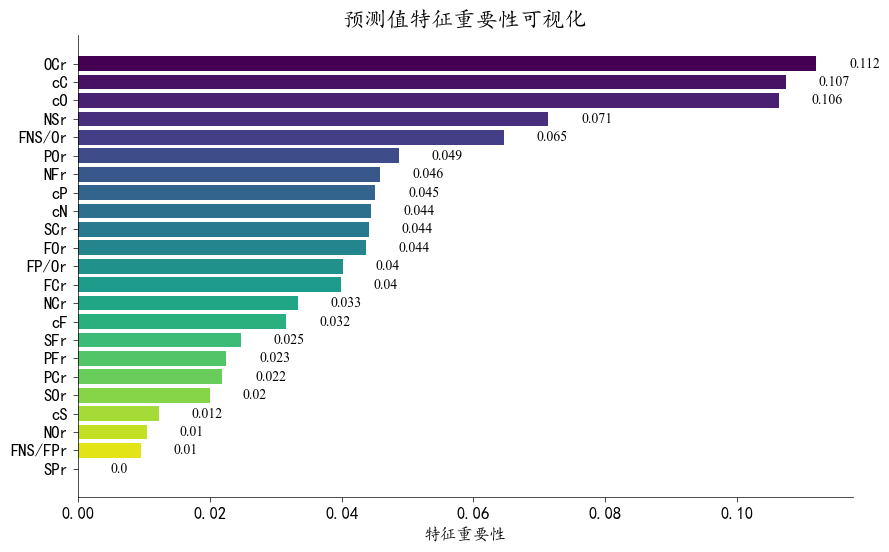

feature_importances_final [0.10027823 0.08735041 0.04710885 0.05072769 0.06089717 0.01649725
 0.07063817 0.03576156 0.04650676 0.00970573 0.04058326 0.02681539
 0.03588196 0.03242331 0.07046    0.02330747 0.02248098 0.0222984
 0.         0.05905054 0.06342623 0.04011507 0.03768556]
features
cC
cO
OCr
NOr
FNS/Or
cP
NSr
cF
cN
FOr
importance
0.10027822628935555
0.08735040907497986
0.0706381693288115
0.07046000097681236
0.06342622726647601
0.060897165288261834
0.05905053561416417
0.050727686076664245
0.04710885064708098
0.046506761481206395


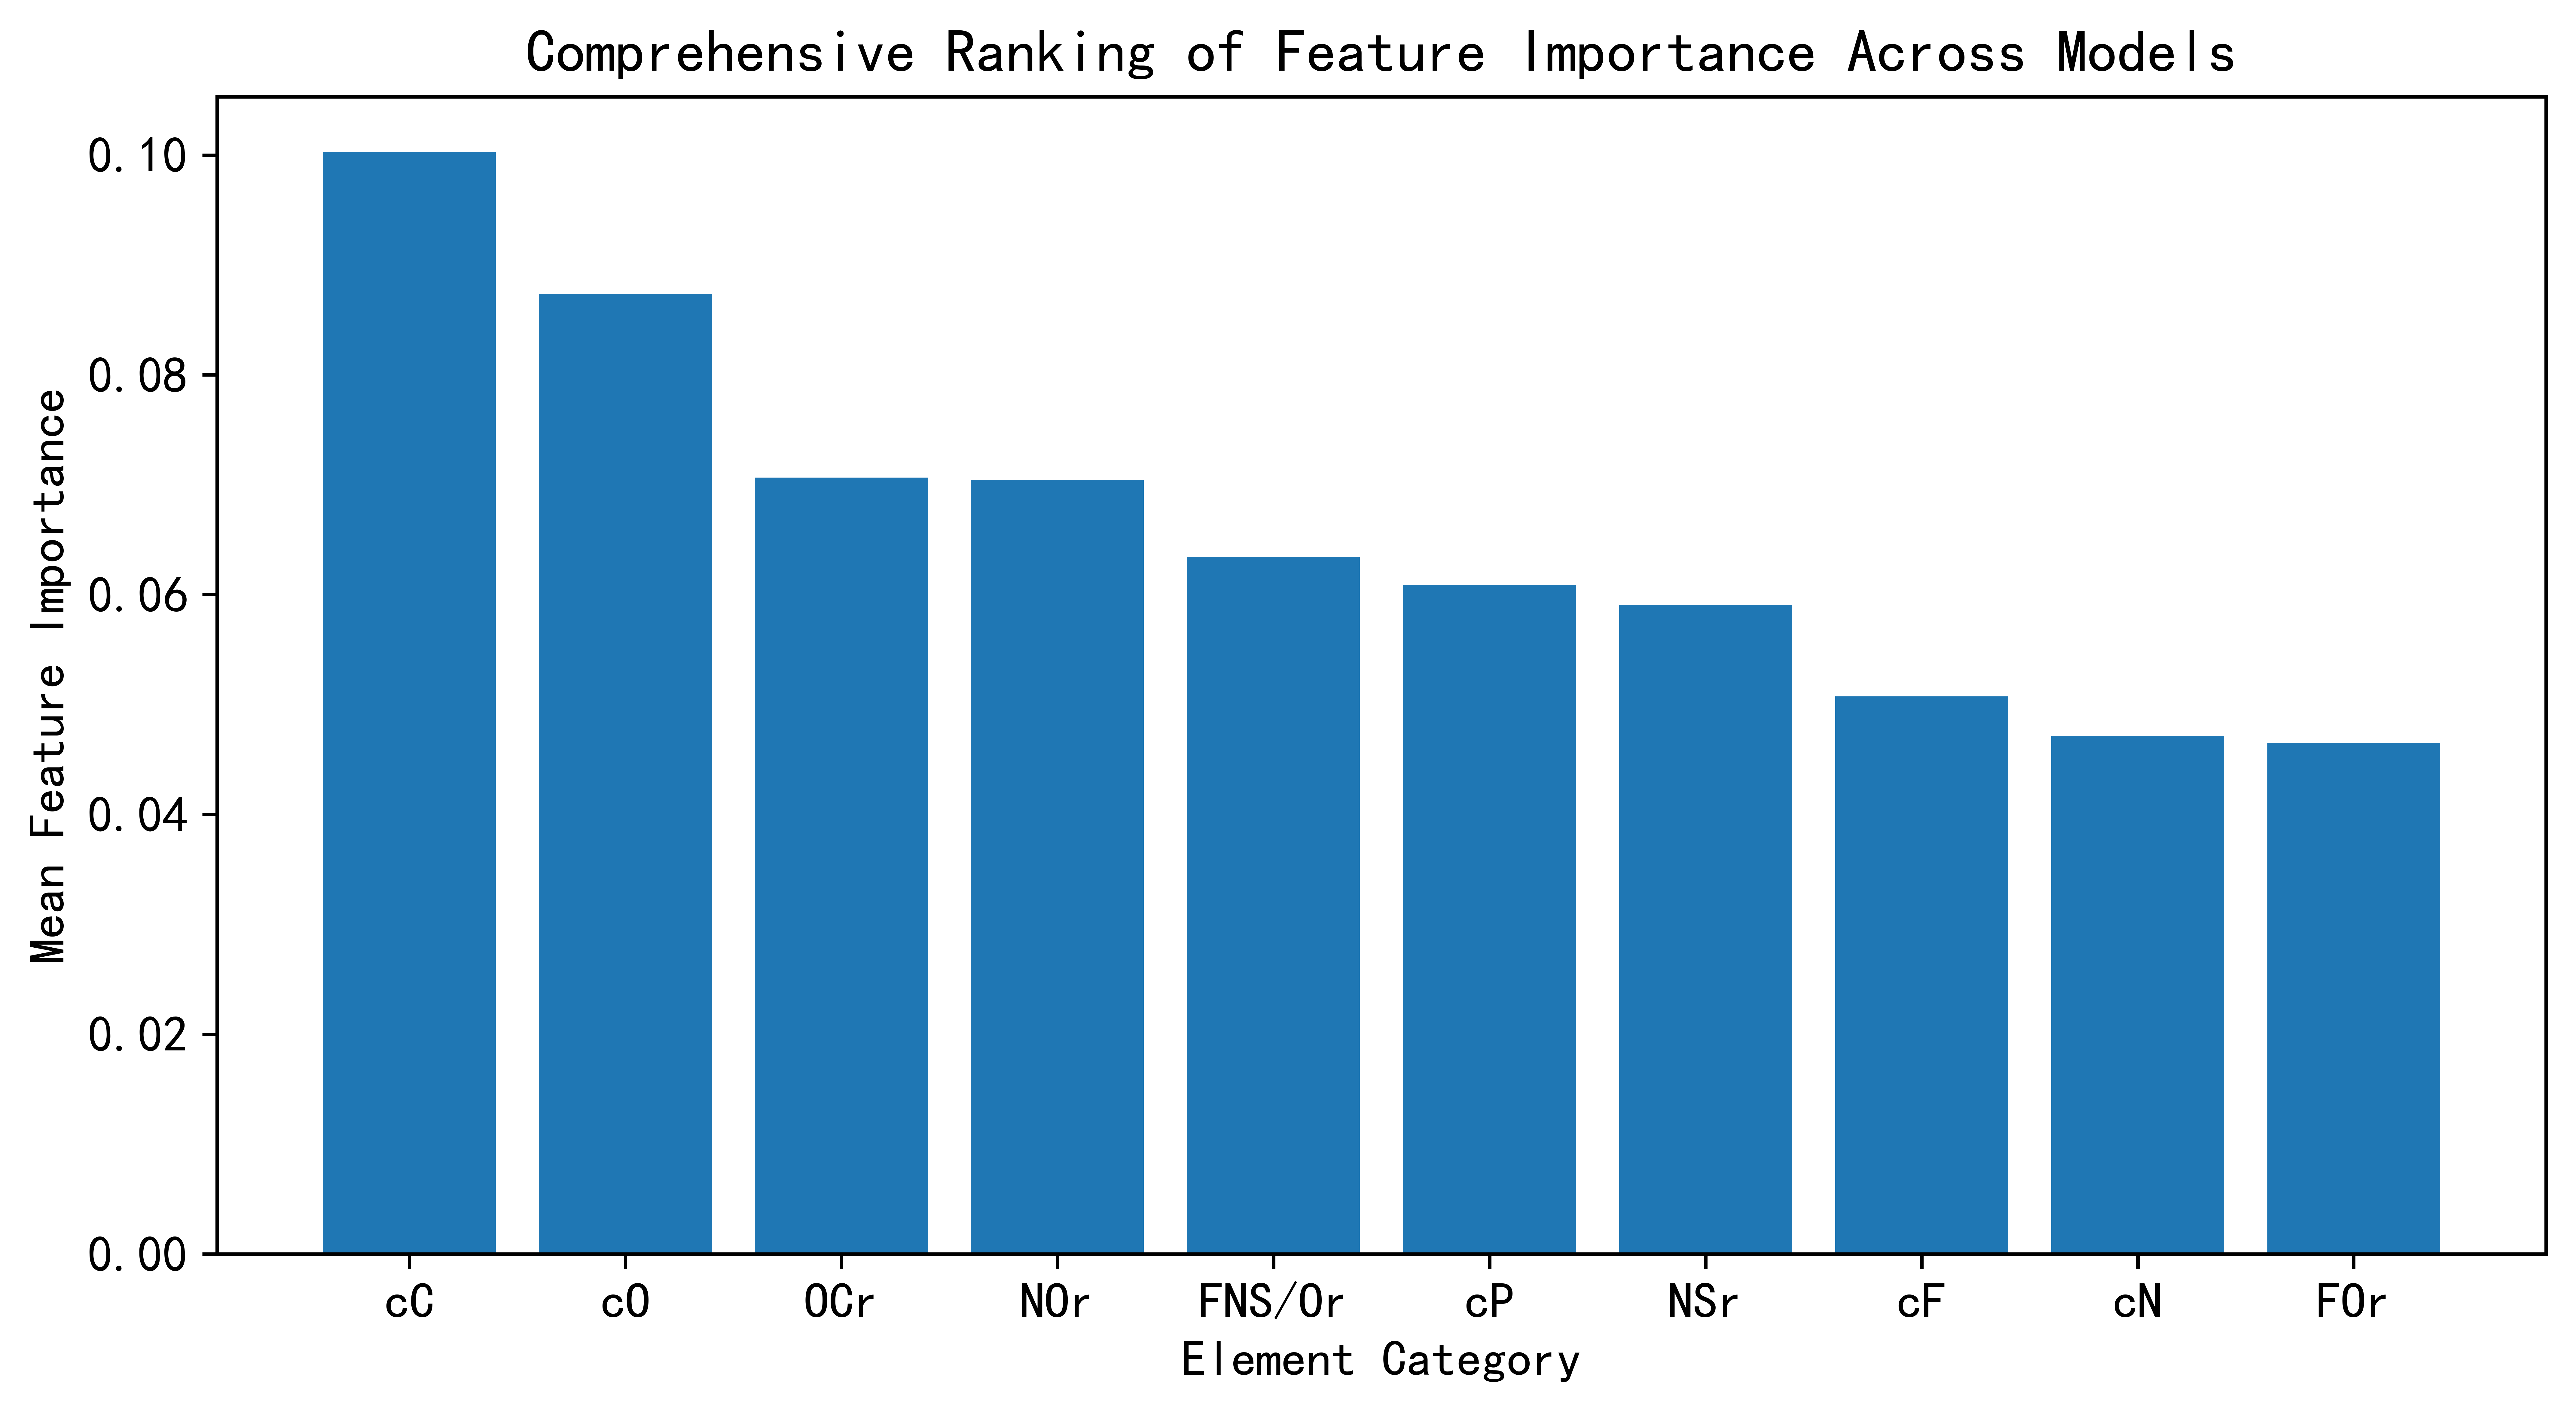

In [7]:
# Read the number of models, then calculate the SHAP values, sort them, and finally determine the actual values by weighting
from utils import *
data_name = 'GWD'  
label_name = 'GWD' # Name of the dataset label
# main_path = r'final'
# path = main_path + '/model'
main_path = f'../Models_and_Results/trained_Models/GWD'
path = main_path + '/model'

data = pd.read_excel(main_path + '/predict.xlsx', sheet_name=f'{data_name}_data')
data = data.fillna(0)
data_target = data[label_name]
feature_names = ['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
                 'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
                 'FP/Or','FNS/FPr']
data_features_part = data[feature_names]
feature_importance_ls = np.zeros(len(feature_names))
model_num = 0

# print(data)
draw_pics = True
# def cal_element(element_name):
excel = main_path + '/predict.xlsx'
feature_importances_final = np.zeros(len(list(feature_names)))

for dirpath, dirnames, filenames in os.walk(path):
    model_num = len(filenames)
    print(model_num)

if draw_pics == True:
    for dirpath, dirnames, filenames in os.walk(path):
        model_num = len(filenames)
        i = 0
        for file in filenames:
            print(f'model{i+1}')
            model_file = os.path.join(dirpath, file)
            model = joblib.load(model_file)
            feature_importances_final += model.feature_importances_

            show_importance(model, feature_names, save_path=main_path, pic_index=i)                           
            # plt.savefig(main_path + f'/Feature importance ranking of different models/Model {i} feature importance ranking.jpg')
            # print(shap_values[1])
            # for index in range(len(feature_names)):
            #     shap_value_ls[index] += np.sum(shap_values[1][:, index])
            # idx = list(feature_names).index('cS')
            # shap_element = np.sum(shap_values[1][:,:, idx])
            # print('The SHAP value of element is:', shap_element)
            plt.show()
            i += 1
        # feature_importances_final /= 3

    feature_importances_final /= model_num
    importance_dict = dict(zip(feature_importances_final, feature_names))
    # print('shap_dict.items\n', shap_dict.items())
    # shap_dict = dict(sorted(shap_dict.items(), key=lambda item: item[0]))
    # print(model_num)
    
    print('feature_importances_final', feature_importances_final)
    # print('shap_values\n', shap_value_ls)
    # print('shap_dict\n', shap_dict)

    importance_tuplelist = [(abs(value), feature) for (value, feature) in importance_dict.items()]
    importance_sorted = sorted(importance_tuplelist, reverse=True)
    # print('type_shap_sorted=', type(shap_sorted), '\n', shap_sorted)
    # print(shap_sorted[0])
    # print(shap_sorted[0][:])
    plt.figure(figsize=(10, 5), dpi=1000)
    x_feature = [j for (i, j) in importance_sorted]
    y_importance_value = [i for (i, j) in importance_sorted]
    plt.title('Comprehensive Ranking of Feature Importance Across Models')
    plt.xlabel('Element Category')
    plt.ylabel('Mean Feature Importance')


    print('features')
    for i in range(10):
        print(x_feature[i])

    print('importance')
    for i in range(10):
        print(y_importance_value[i])


    plt.bar(x_feature[:10], y_importance_value[:10])
    # plt.savefig(main_path + '/Feature Importance Ranking.jpg')

    # print(x_feature)

    plt.show()

# for dirpath, dirnames, filenames in os.walk(path):
#     model_num = len(filenames)
#     fold_ls = create_empty_ls(model_num)
#     k_fold_df = pd.read_excel(excel, sheet_name='k-fold')
#     i = 0
#     for file in filenames:
#         print('fold_ls_original', fold_ls[i])
#         fold_ls[i] = list(k_fold_df.iloc[i][~k_fold_df.iloc[i].isna()])
#         fold_ls[i].pop(0)
#         print(f'fold_{i}=', fold_ls[i])
#         x_test = data_features_part.iloc[fold_ls[i]]
#         y_test = data_target.iloc[fold_ls[i]]
#         model_file = os.path.join(dirpath, file)
#         model = joblib.load(model_file)
 
#         explainer = shap.TreeExplainer(model)
#         shap.initjs()
 
#         shap_values = explainer.shap_values(x_test)
 
#         df0 = pd.DataFrame(np.array(x_test))
#         df = pd.DataFrame(np.array(shap_values[1]))
#         book = load_workbook(excel)
 
#         with pd.ExcelWriter(excel) as writer:
#             writer.book = book
#             df0.to_excel(writer, sheet_name=f'original{i}')
#             df.to_excel(writer, sheet_name=f'model{i}')
#         # print(f'model{i} shap_values of test data', shap_values)
#         i += 1

3.SHAP results for GDS model

3
model1
feature_importance_name:
 12        NFr
14        NOr
8         FOr
1          cO
2          cN
0          cC
17        SFr
7         FCr
21      FP/Or
19        NSr
22    FNS/FPr
10        NCr
6         OCr
11        SCr
5          cS
3          cF
20     FNS/Or
15        SOr
4          cP
9         PCr
13        POr
16        PFr
18        SPr
Name: feature, dtype: object
feature_importance_value:
 12    0.091770
14    0.087691
8     0.085091
1     0.082376
2     0.073304
0     0.071121
17    0.061787
7     0.060895
21    0.058715
19    0.055770
22    0.049179
10    0.043891
6     0.038571
11    0.034517
5     0.032717
3     0.029436
20    0.027140
15    0.013890
4     0.002137
9     0.000000
13    0.000000
16    0.000000
18    0.000000
Name: importance, dtype: float64


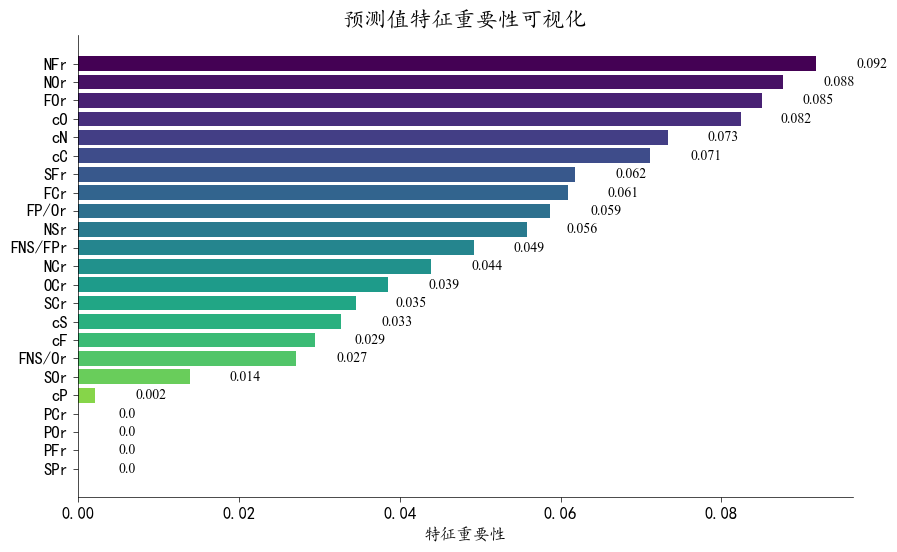

model2
feature_importance_name:
 2          cN
5          cS
14        NOr
7         FCr
21      FP/Or
19        NSr
20     FNS/Or
3          cF
15        SOr
8         FOr
12        NFr
1          cO
17        SFr
6         OCr
0          cC
10        NCr
22    FNS/FPr
13        POr
4          cP
16        PFr
18        SPr
9         PCr
11        SCr
Name: feature, dtype: object
feature_importance_value:
 2     0.118291
5     0.101021
14    0.085260
7     0.081995
21    0.075938
19    0.069255
20    0.063401
3     0.062511
15    0.057499
8     0.046168
12    0.043279
1     0.042155
17    0.040895
6     0.029210
0     0.024025
10    0.023636
22    0.019444
13    0.008194
4     0.007821
16    0.000000
18    0.000000
9     0.000000
11    0.000000
Name: importance, dtype: float64


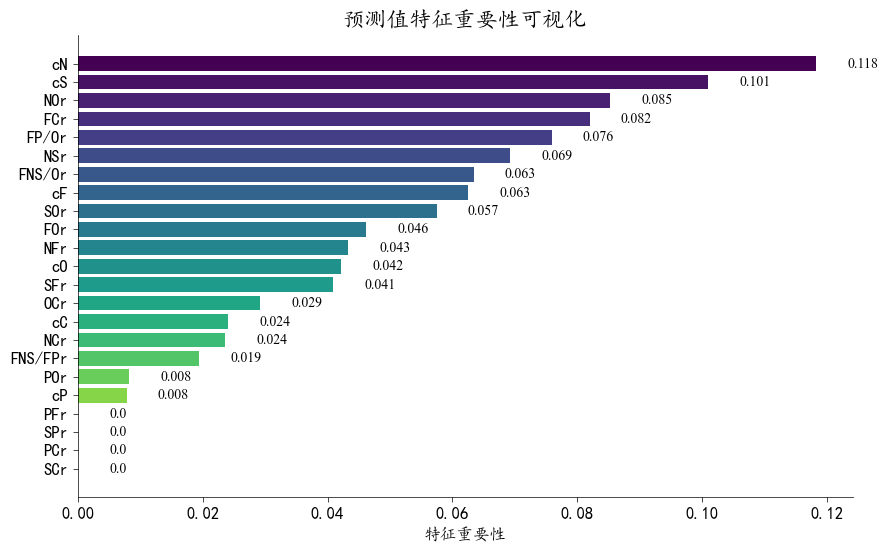

model3
feature_importance_name:
 1          cO
2          cN
19        NSr
10        NCr
14        NOr
5          cS
3          cF
0          cC
7         FCr
6         OCr
15        SOr
21      FP/Or
17        SFr
20     FNS/Or
11        SCr
12        NFr
8         FOr
22    FNS/FPr
13        POr
18        SPr
16        PFr
9         PCr
4          cP
Name: feature, dtype: object
feature_importance_value:
 1     0.119827
2     0.111472
19    0.091621
10    0.076998
14    0.069114
5     0.066066
3     0.058074
0     0.048808
7     0.044747
6     0.044580
15    0.044533
21    0.035315
17    0.032281
20    0.029912
11    0.029461
12    0.026092
8     0.021901
22    0.015572
13    0.015519
18    0.010540
16    0.007567
9     0.000000
4     0.000000
Name: importance, dtype: float64


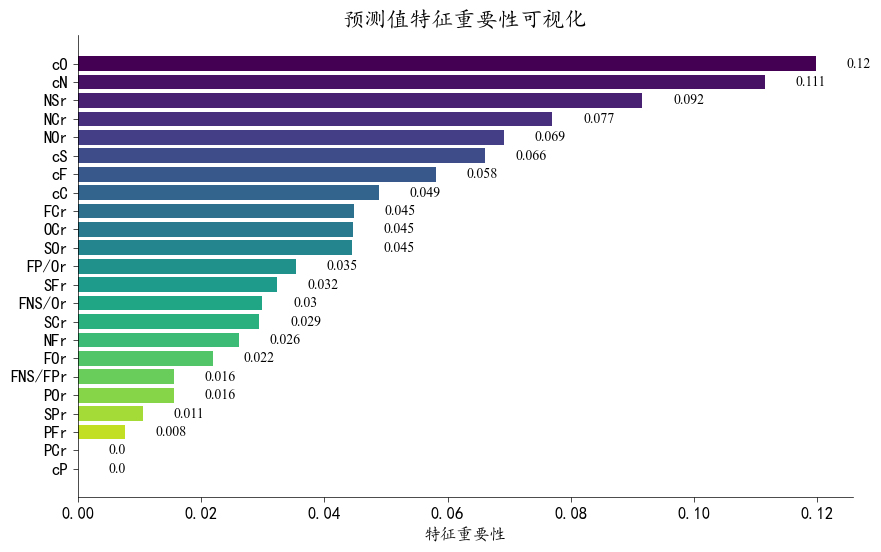

feature_importances_final [0.04798448 0.08145255 0.10102218 0.05000696 0.00331959 0.06660146
 0.03745387 0.06254567 0.05105347 0.         0.04817499 0.02132612
 0.05371386 0.00790454 0.08068847 0.03864094 0.00252246 0.04498764
 0.00351317 0.07221523 0.0401509  0.05665615 0.0280653 ]
features
cN
cO
NOr
NSr
cS
FCr
FP/Or
NFr
FOr
cF
importance
0.10102217609757025
0.08145255346303772
0.08068846723472638
0.07221523245580802
0.0666014554348262
0.06254567030908674
0.056656150380212295
0.05371386020008891
0.05105346938535829
0.05000696478458669


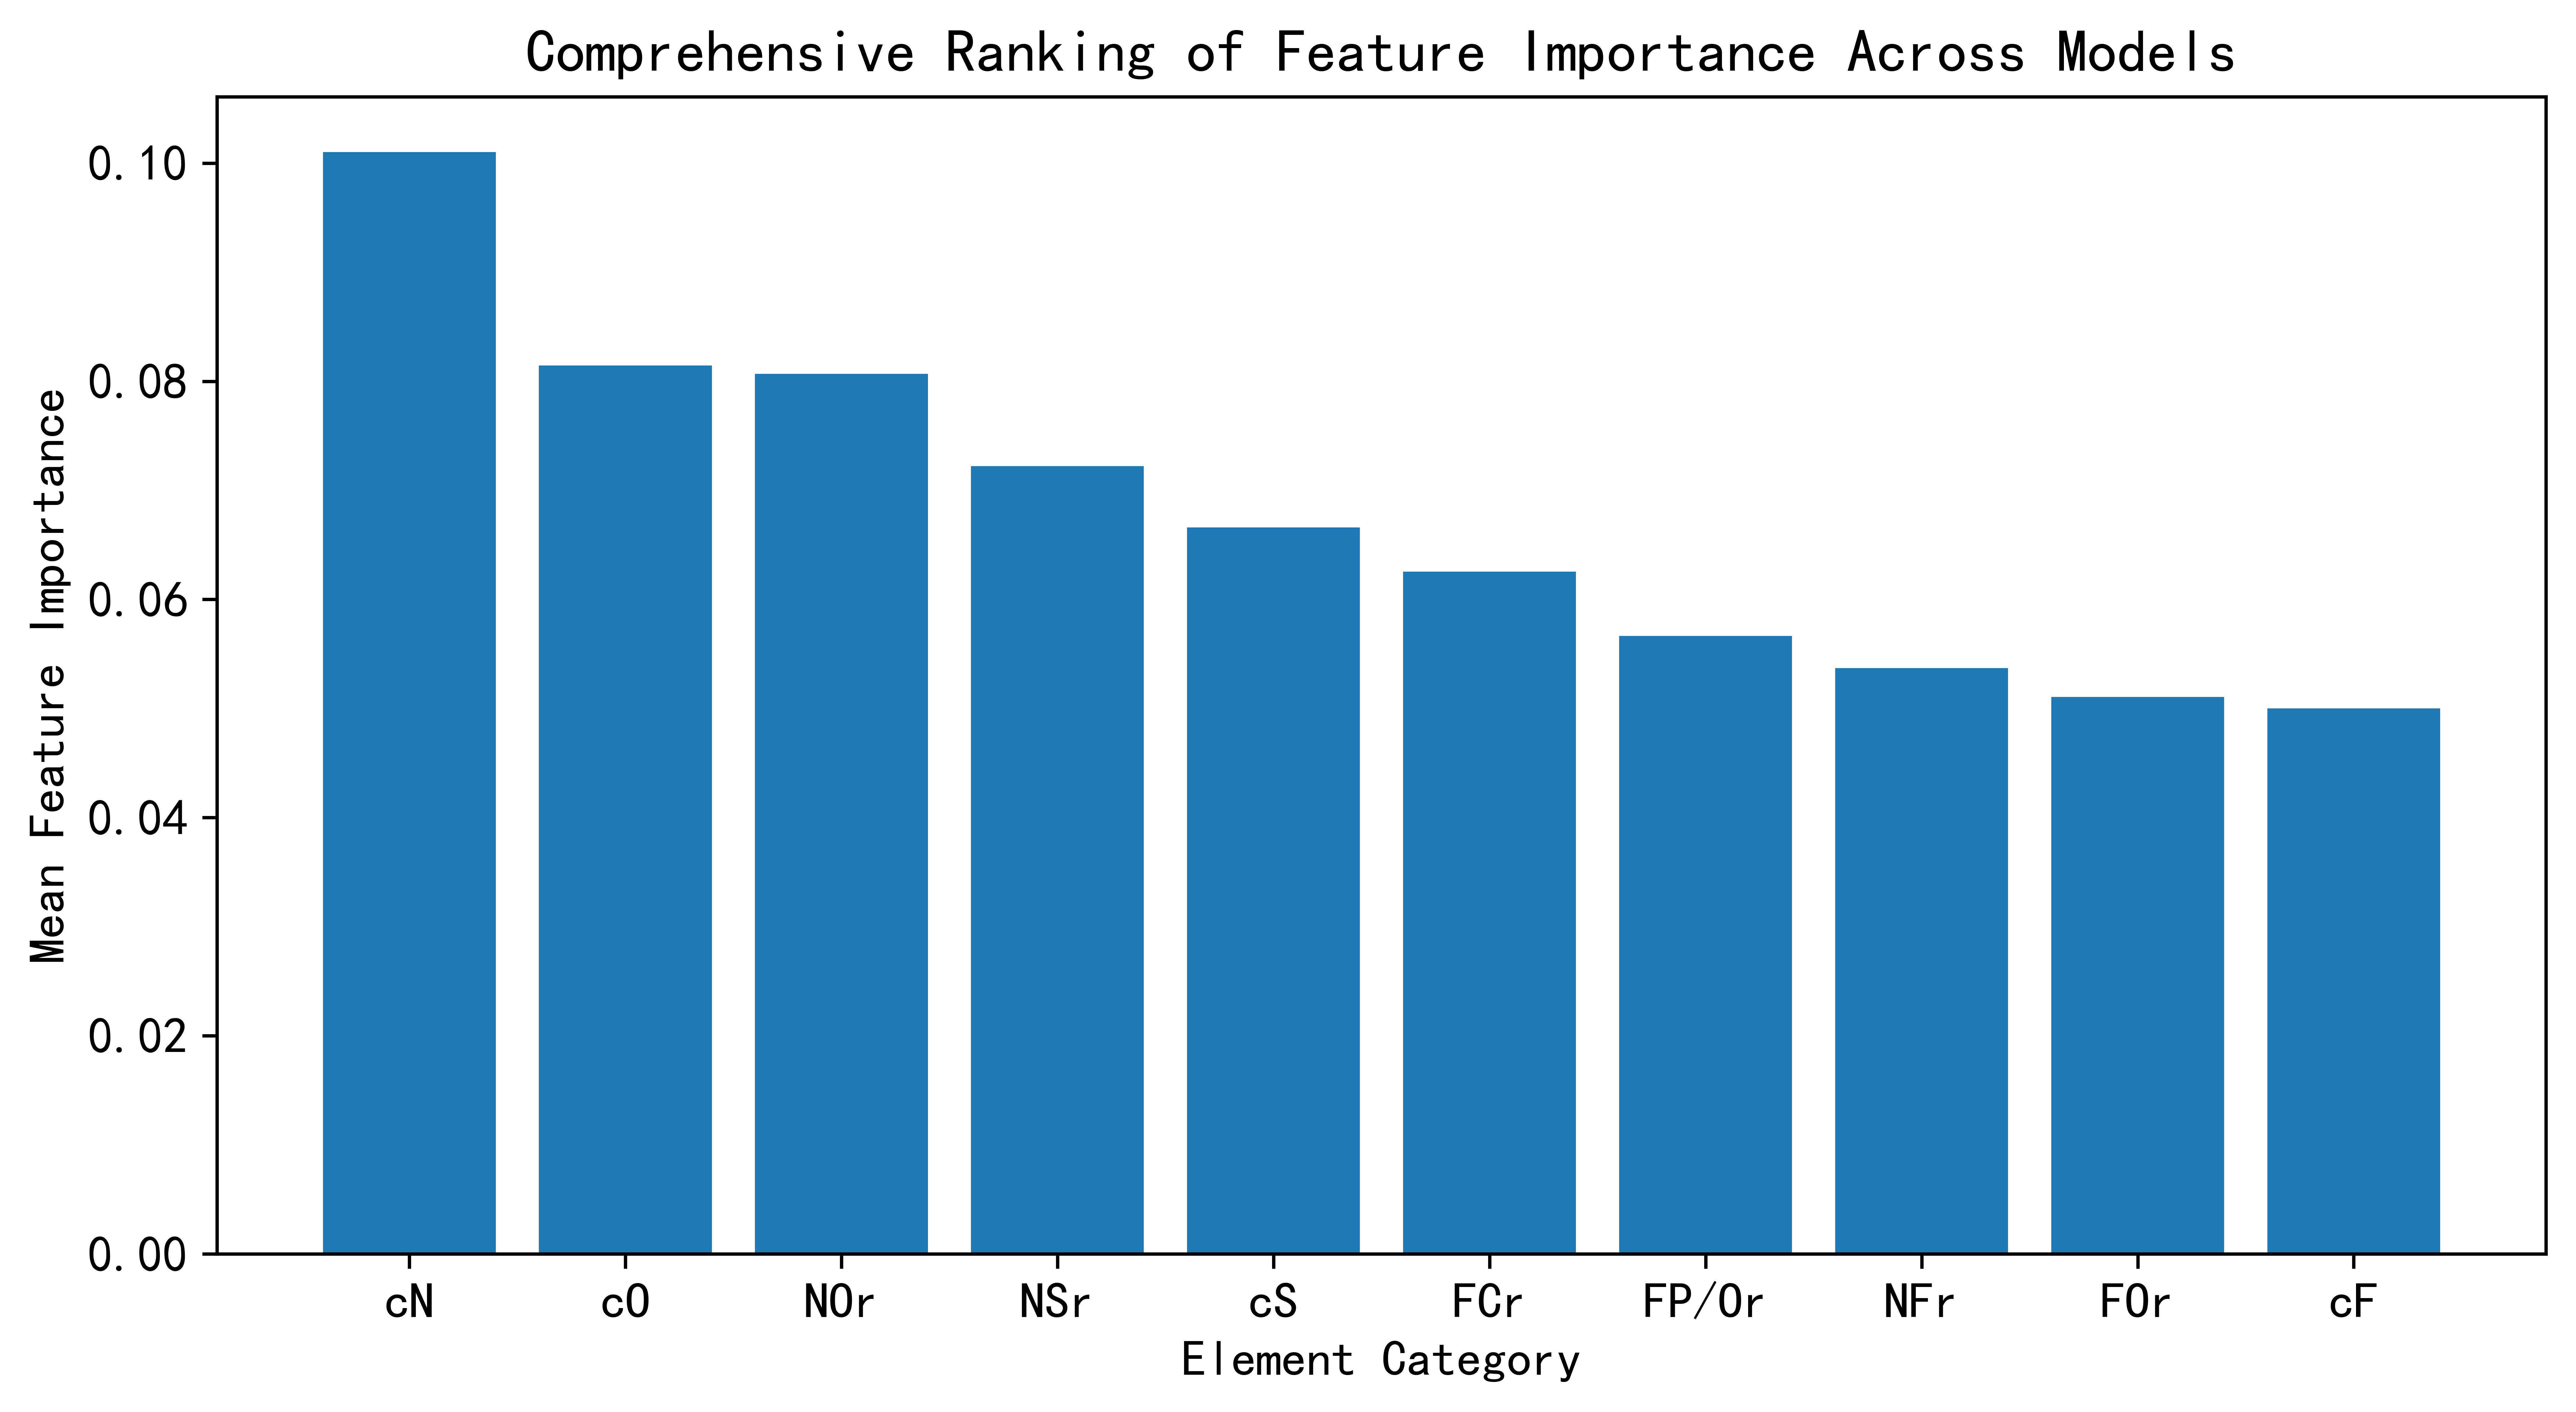

In [8]:
# Read the number of models, then calculate the SHAP values, sort them, and finally determine the actual values by weighting
from utils import *
data_name = 'GDS'  
label_name = 'GDS' # Name of the dataset label
# main_path = r'final'
# path = main_path + '/model'
main_path = f'../Models_and_Results/trained_Models/GDS'
path = main_path + '/model'

data = pd.read_excel(main_path + '/predict.xlsx', sheet_name=f'{data_name}_data')
data = data.fillna(0)
data_target = data[label_name]
feature_names = ['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
                 'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
                 'FP/Or','FNS/FPr']
data_features_part = data[feature_names]
feature_importance_ls = np.zeros(len(feature_names))
model_num = 0

# print(data)
draw_pics = True
# def cal_element(element_name):
excel = main_path + '/predict.xlsx'
feature_importances_final = np.zeros(len(list(feature_names)))

for dirpath, dirnames, filenames in os.walk(path):
    model_num = len(filenames)
    print(model_num)

if draw_pics == True:
    for dirpath, dirnames, filenames in os.walk(path):
        model_num = len(filenames)
        i = 0
        for file in filenames:
            print(f'model{i+1}')
            model_file = os.path.join(dirpath, file)
            model = joblib.load(model_file)
            feature_importances_final += model.feature_importances_

            show_importance(model, feature_names, save_path=main_path, pic_index=i)                           
            # plt.savefig(main_path + f'/Feature importance ranking of different models/Model {i} feature importance ranking.jpg')
            # print(shap_values[1])
            # for index in range(len(feature_names)):
            #     shap_value_ls[index] += np.sum(shap_values[1][:, index])
            # idx = list(feature_names).index('cS')
            # shap_element = np.sum(shap_values[1][:,:, idx])
            # print('The SHAP value of element is:', shap_element)
            plt.show()
            i += 1
        # feature_importances_final /= 3

    feature_importances_final /= model_num
    importance_dict = dict(zip(feature_importances_final, feature_names))
    # print('shap_dict.items\n', shap_dict.items())
    # shap_dict = dict(sorted(shap_dict.items(), key=lambda item: item[0]))
    # print(model_num)
    
    print('feature_importances_final', feature_importances_final)
    # print('shap_values\n', shap_value_ls)
    # print('shap_dict\n', shap_dict)

    importance_tuplelist = [(abs(value), feature) for (value, feature) in importance_dict.items()]
    importance_sorted = sorted(importance_tuplelist, reverse=True)
    # print('type_shap_sorted=', type(shap_sorted), '\n', shap_sorted)
    # print(shap_sorted[0])
    # print(shap_sorted[0][:])
    plt.figure(figsize=(10, 5), dpi=1000)
    x_feature = [j for (i, j) in importance_sorted]
    y_importance_value = [i for (i, j) in importance_sorted]
    plt.title('Comprehensive Ranking of Feature Importance Across Models')
    plt.xlabel('Element Category')
    plt.ylabel('Mean Feature Importance')


    print('features')
    for i in range(10):
        print(x_feature[i])

    print('importance')
    for i in range(10):
        print(y_importance_value[i])


    plt.bar(x_feature[:10], y_importance_value[:10])
    # plt.savefig(main_path + '/Feature Importance Ranking.jpg')

    # print(x_feature)

    plt.show()

# for dirpath, dirnames, filenames in os.walk(path):
#     model_num = len(filenames)
#     fold_ls = create_empty_ls(model_num)
#     k_fold_df = pd.read_excel(excel, sheet_name='k-fold')
#     i = 0
#     for file in filenames:
#         print('fold_ls_original', fold_ls[i])
#         fold_ls[i] = list(k_fold_df.iloc[i][~k_fold_df.iloc[i].isna()])
#         fold_ls[i].pop(0)
#         print(f'fold_{i}=', fold_ls[i])
#         x_test = data_features_part.iloc[fold_ls[i]]
#         y_test = data_target.iloc[fold_ls[i]]
#         model_file = os.path.join(dirpath, file)
#         model = joblib.load(model_file)
 
#         explainer = shap.TreeExplainer(model)
#         shap.initjs()
 
#         shap_values = explainer.shap_values(x_test)
 
#         df0 = pd.DataFrame(np.array(x_test))
#         df = pd.DataFrame(np.array(shap_values[1]))
#         book = load_workbook(excel)
 
#         with pd.ExcelWriter(excel) as writer:
#             writer.book = book
#             df0.to_excel(writer, sheet_name=f'original{i}')
#             df.to_excel(writer, sheet_name=f'model{i}')
#         # print(f'model{i} shap_values of test data', shap_values)
#         i += 1